In [195]:
# Full library list and version numbers

print('This notebook was prepared using:')

import sys
print('python version %s' % sys.version)

import numpy as np
print('numpy version %s' % np.__version__)

import seaborn as sns
print('seaborn version %s' % sns.__version__)

import matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
print('matplotlib version %s' % matplotlib.__version__)

sys.path.append('./src')

import mplot as mp  # See mplot.py in the current directory

import scipy
from scipy import stats
print('scipy version %s' % scipy.__version__)

import pickle
print('pickle version %s' % pickle.format_version)

import importlib

import copy

import lolipop_helper
import figures as FIG
import PALTEanalysis
import tobramycin_analysis

import MPL as MPL
import analyze_and_plot as AP
import reconstruct_clades as RC
import infer_fitness as IF
import print_info as PI
import LTEE
import LTEE_helper as LH
import simulation_helper as SH

# GitHub directories
DATA_DIR = './data'
SIMULATION_DIR = './data/simulation'
CLUSTERIZATION_OUTPUT_DIR = './data/clusterization_output'
RECONSTRUCTION_OUTPUT_DIR = './data/reconstruction_output'
LOLIPOP_JOBS_DIR = './data/lolipop/jobs'
LOLIPOP_INPUT_DIR = './data/lolipop/input'
LOLIPOP_OUTPUT_DIR = './data/lolipop/output'
LOLIPOP_PARSED_OUTPUT_DIR = './data/lolipop/parsed_output'
JOB_DIR = './jobs'
FIG_DIR = './figures'

METHODS = FIG.METHODS

This notebook was prepared using:
python version 3.7.13 (default, Mar 28 2022, 07:24:34) 
[Clang 12.0.0 ]
numpy version 1.16.2
seaborn version 0.11.2
matplotlib version 3.1.2
scipy version 1.5.2
pickle version 4.0


In [3]:
def reload():
    importlib.reload(AP)
    importlib.reload(RC)
    importlib.reload(IF)
    importlib.reload(LH)
    importlib.reload(PI)
    importlib.reload(lolipop_helper)
    importlib.reload(FIG)
    importlib.reload(PALTEanalysis)
    importlib.reload(tobramycin_analysis)
    importlib.reload(mp)
    importlib.reload(SH)
reload()

In [4]:
SH.METHODS

['True', 'dxdx', 'Lolipop', 'Evoracle', 'LB', 'SL']

In [5]:
def resetPlottingParams():
    PARAMS = {'text.usetex': False, 'mathtext.fontset': 'stixsans', 'mathtext.default': 'regular', 'pdf.fonttype': 42, 'ps.fonttype': 42}
    plt.rcParams.update(matplotlib.rcParamsDefault)
    plt.rcParams.update(PARAMS)

In [6]:
resetPlottingParams()

In [7]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

## Figures and data analysis

<a id='fig1'></a>

### Figure 1. Method overview

In [7]:
%%time
reload()
params = SH.Params()  # Default parameters for simulation
simulation = SH.load_simulation(params, 6)
reconstruction, evaluation = SH.get_reconstruction_of_simulation(simulation)

CPU times: user 4.8 s, sys: 42.4 ms, total: 4.85 s
Wall time: 4.87 s


In [14]:
reload()
FIG.save_subfigure_for_method_overview(reconstruction, save_file_prefix='./figures/subfigures/0-horizontal')

### Figure 2. Clade competition is accurately reconstructed from simulated allele frequency trajectories. 

In [8]:
%%time
reload()
params = SH.Params()  # Default parameters for simulation
# Load the first simulation, and get reconstruction result
simulation = SH.load_simulation(params, 0)
reconstruction, evaluation = SH.get_reconstruction_of_simulation(simulation)

CPU times: user 5.77 s, sys: 54.5 ms, total: 5.82 s
Wall time: 5.84 s


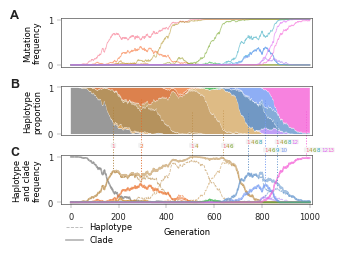

In [137]:
reload()
FIG.plot_figure_reconstruction_example(simulation, reconstruction, 
    annotate_together=True, plot_single_column=True, 
    plot_dot_for_WT_locus=False, add_background_behind_annotation=True,
    annotation_ys=[1.22] * 4 + [1.3, 1.12, 1.3, 1.12],
    genotype_color_indices_to_skip=[7, 8, 9],
    save_file=FIG_DIR + "/fig-reconstruction-example.pdf")


<a id='fig2'></a>

### Figure 3. Covariance and fitness values are accurately inferred from simulated allele frequency trajectories. 

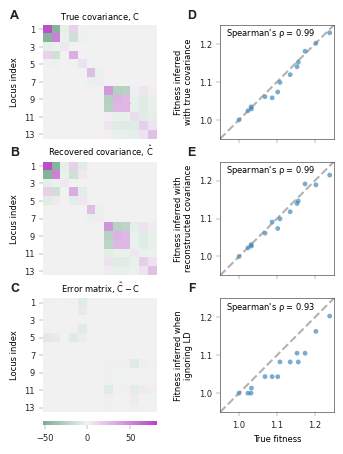

In [83]:
reload()
FIG.plot_figure_performance_example(simulation, reconstruction, evaluation,
    save_file=FIG_DIR + "/fig-perf-example-new.pdf")

<a id='fig3'></a>

### Figure 4. Performance benchmarking on simulated data.

In [210]:
%%time
reload()
params = SH.Params()
(MAE_cov, Spearmanr_cov, Pearsonr_cov, MAE_selection, Spearmanr_selection, 
 Pearsonr_selection, MAE_fitness, Spearmanr_fitness, 
 Pearsonr_fitness) = SH.parse_performance_on_simulated_data(params, computePerfOnGenotypeFitness=True)


Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
CPU times: user 5.72 s, sys: 137 ms, total: 5.85 s
Wall time: 6.14 s


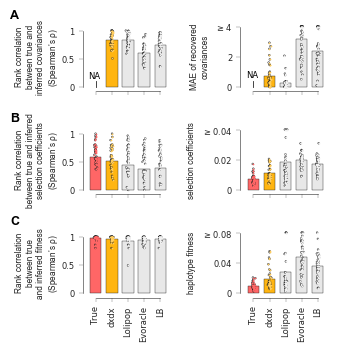

In [211]:
reload()
FIG.plot_figure_performance_on_simulated_data(MAE_cov, 
    Spearmanr_cov, MAE_selection, Spearmanr_selection, 
    MAE_fitness=MAE_fitness, Spearmanr_fitness=Spearmanr_fitness, 
    two_columns=True, evaluate_fitness=True, method_list=FIG.METHODS[:-1],  # Excluding SL method
    save_file=FIG_DIR + "/fig-perf-sim-true-new.pdf")

In [201]:
%%time
reload()
params = SH.Params()
(MAE_cov, Spearmanr_cov, Pearsonr_cov, MAE_selection, Spearmanr_selection, 
 Pearsonr_selection, MAE_fitness, Spearmanr_fitness, 
 Pearsonr_fitness) = SH.parse_performance_on_simulated_data(params, computePerfOnGenotypeFitness=True, computeErrorOnCorrelationMatrix=True)

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
CPU times: user 5.85 s, sys: 162 ms, total: 6.01 s
Wall time: 6.2 s


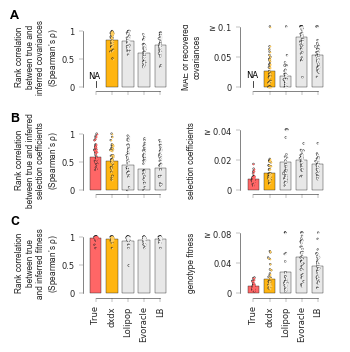

In [205]:
reload()
FIG.plot_figure_performance_on_simulated_data(MAE_cov, 
    Spearmanr_cov, MAE_selection, Spearmanr_selection, 
    MAE_fitness=MAE_fitness, Spearmanr_fitness=Spearmanr_fitness, ymax_MAE_covariance=0.1,
    two_columns=True, evaluate_fitness=True, method_list=FIG.METHODS[:-1],  # Excluding SL method
    save_file=FIG_DIR + "/fig-perf-sim-true-new-corr.pdf")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


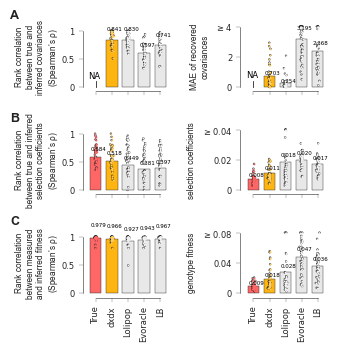

posx and posy should be finite values
posx and posy should be finite values


In [34]:
# reload()
# FIG.plot_figure_performance_on_simulated_data(MAE_cov, 
#     Spearmanr_cov, MAE_selection, Spearmanr_selection, 
#     MAE_fitness=MAE_fitness, Spearmanr_fitness=Spearmanr_fitness, 
#     two_columns=True, evaluate_fitness=True, method_list=FIG.METHODS[:-1],  # Excluding SL method
#     annot=True,
#     save_file=FIG_DIR + "/fig-perf-sim-true-new-annot.pdf")

<a id='fig4'></a>

### Figure 5.  An overview of clusterization results on the LTEE data.

In [31]:
%%time
reload()
pop = 'p3'
rec_0_70 = LH.reconstruct_for_a_period(pop, 0, 70, debug=False, verbose=False, plot=False)
rec_70_122 = LH.reconstruct_for_a_period(pop, 70, 122, debug=False, verbose=False, plot=False)

CPU times: user 30.3 s, sys: 1.19 s, total: 31.5 s
Wall time: 31.9 s


In [224]:
%%time
reload()
recs = {}
pop = 'm3'
tStart, T = 0, 122
tSplit1, tSplit2 = 95, 105
recs[(tStart, tSplit1)] = LH.reconstruct_for_a_period(pop, tStart, tSplit1, debug=False, verbose=False, plot=False)
recs[(tSplit1, tSplit2)] = LH.reconstruct_for_a_period(pop, tSplit1, tSplit2, debug=False, verbose=False, plot=False)
recs[(tSplit2, T)] = LH.reconstruct_for_a_period(pop, tSplit2, T, debug=False, verbose=False, plot=False)

CPU times: user 17.4 s, sys: 226 ms, total: 17.7 s
Wall time: 17.8 s


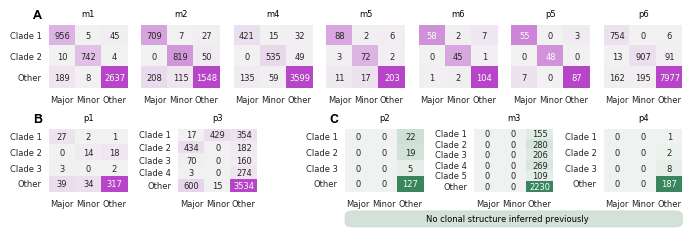

CPU times: user 5.26 s, sys: 1.32 s, total: 6.58 s
Wall time: 5.12 s


In [245]:
%%time
reload()
FIG.plot_figure_identities_LTEE(LH.populations, 
    reconstructions, LH.data, rec1_p3=rec_0_70, rec2_p3=rec_70_122,
    rec1_m3=recs[(tStart, tSplit1)], rec2_m3=recs[(tSplit1, tSplit2)], rec3_m3=recs[(tSplit2, T)],
    save_file=FIG_DIR + "/fig-identities-LTEE-with-horizontal-text-new-p3-two-periods.pdf")

### Figure 6.  Reconstruction on population m6 of the LTEE data is nearly identical with previous results. 

In [219]:
%%time
LH.loadData(LH.populations)

CPU times: user 1h 2min 25s, sys: 10.8 s, total: 1h 2min 35s
Wall time: 1h 3min 11s


In [78]:
%%time
LH.loadData(['m3'])

CPU times: user 5min, sys: 711 ms, total: 5min 1s
Wall time: 5min 2s


In [217]:
%%time
reload()
populations = [pop for pop in LH.populations if pop !='p6']
reconstructions = LH.load_reconstructions_for_LTEE(populations, with_cov=False)
reconstructions.update(LH.load_reconstructions_for_LTEE(["p6"]))

CPU times: user 282 ms, sys: 967 ms, total: 1.25 s
Wall time: 2.02 s


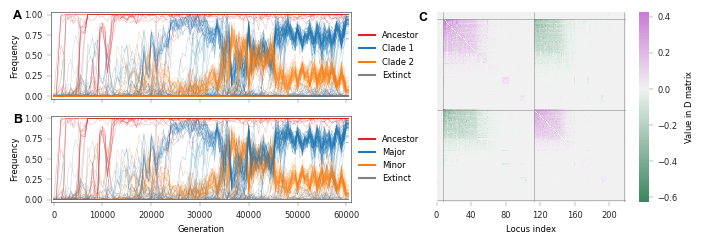

In [223]:
reload()
pop = 'm6'
FIG.plot_figure_reconstruction_example_LTEE(pop, reconstructions[pop], 
    LH.data, alpha=0.4, 
    save_file=FIG_DIR + "/fig-reconstruction-example-LTEE-new.pdf")

<a id='fig5'></a>

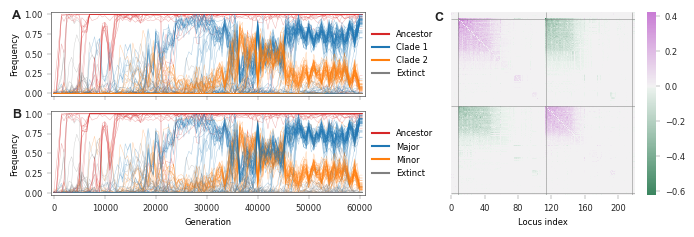

In [99]:
# reload()
# pop = 'm6'
# FIG.plot_figure_reconstruction_example_LTEE(pop, reconstructions[pop], 
#     LH.data, alpha=0.4, 
#     save_file=FIG_DIR + "/fig-reconstruction-example-LTEE.svg")

### Figure 7.  Reconstruction on population m3 of the LTEE data revealed clonal interference not found in previous results. 

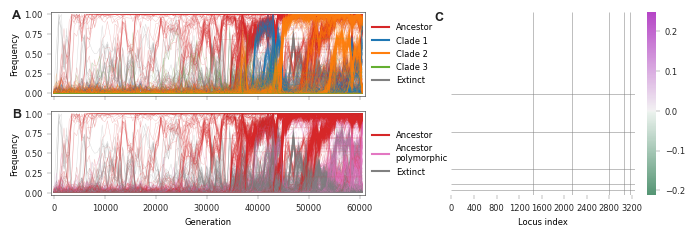

In [80]:
# reload()
# pop = 'm3'
# FIG.plot_figure_reconstruction_example_LTEE(pop, reconstructions[pop], 
#     LH.data, alpha=0.3,
#     save_file=FIG_DIR + "/fig-reconstruction-example-LTEE-nonclonal-new.pdf")

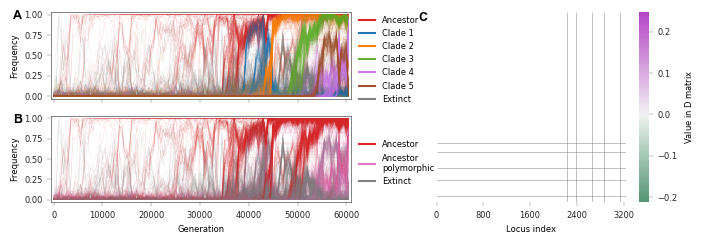

CPU times: user 1min 1s, sys: 3.46 s, total: 1min 4s
Wall time: 1min 4s


In [225]:
%%time
reload()
FIG.plot_figure_reconstruction_example_LTEE_two_periods(pop, recs[(0, tSplit1)], recs[(tSplit1, tSplit2)], LH.data, rec3=recs[(tSplit2, T)],
    directory=CLUSTERIZATION_OUTPUT_DIR,
    alpha=0.15, color_shared_muts=False, remove_clade_muts_before_period_start=True,
    save_file=FIG_DIR + f"/fig-reconstruction-example-LTEE-{pop}-three-periods-split-at-{tSplit1}-and-{tSplit2}-remove_clade_muts_before_period_start.pdf")

<a id='fig6'></a>

<a id='fig7'></a>

### Figure 8.  Reconstruction on data from ***Harris, K. B., Flynn, K. M. & Cooper, V. S. Polygenic Adaptation and Clonal Interference Enable Sustained Diversity in Experimental Pseudomonas aeruginosa Populations. Mol. Biol. Evol. 38, 5359–5375 (2021)***

In [226]:
%%time
reload()
trajectories = PALTEanalysis.parse_trajectories()
measured_fitness = PALTEanalysis.parse_measured_fitness()

reconstructions_PALTE, evaluations_PALTE, inferences_PALTE = PALTEanalysis.parse_reconstructions(assumeCooperationAmongSharedMuts=True)

intCov_lolipop_PALTE, selection_lolipop_PALTE, fitness_lolipop_PALTE = PALTEanalysis.parse_Lolipop_results()

intCov_evoracle_PALTE, selection_evoracle_PALTE, fitness_evoracle_PALTE = PALTEanalysis.parse_evoracle_results()

inferred_fitness_list = PALTEanalysis.parse_inferred_fitness_list(inferences_PALTE, fitness_lolipop_PALTE, fitness_evoracle_PALTE)


4
4


/Users/yunxiao/anaconda3/envs/evoracle/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/yunxiao/anaconda3/envs/evoracle/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


4
4
4
4
CPU times: user 28.4 s, sys: 5.02 s, total: 33.5 s
Wall time: 15.2 s


[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9642857142857145, 0.6785714285714287, nan, 0.9285714285714288]


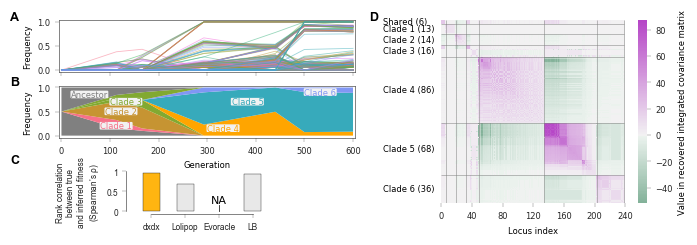

In [227]:
reload()
pop = 'B1'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
    save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}-new.pdf")

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9642857142857145, 0.6785714285714287, nan, 0.9285714285714288]


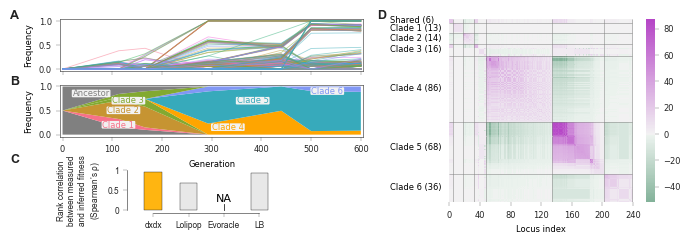

In [38]:
# reload()
# pop = 'B1'
# FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
#     reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}-new-assumeCoopAmongSharedMuts.pdf")

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


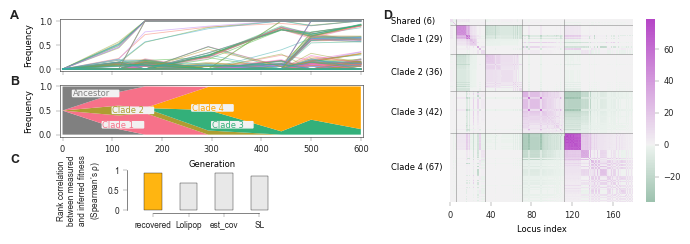

In [102]:
reload()
pop = 'B2'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=None)

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


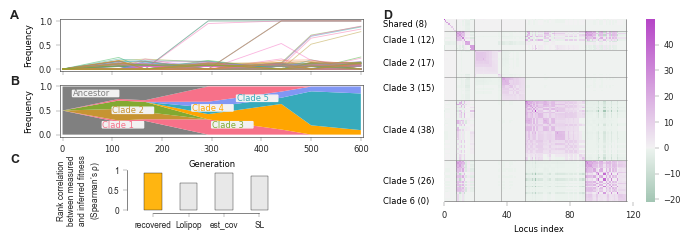

In [103]:
reload()
pop = 'B3'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=None)

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


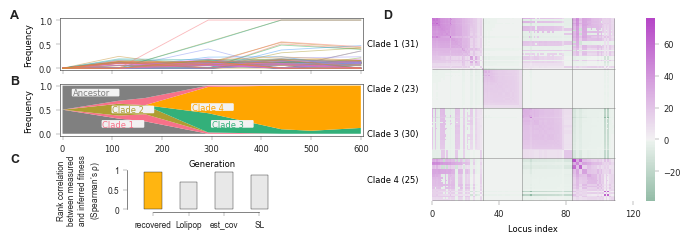

In [104]:
reload()
pop = 'P1'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=None)

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


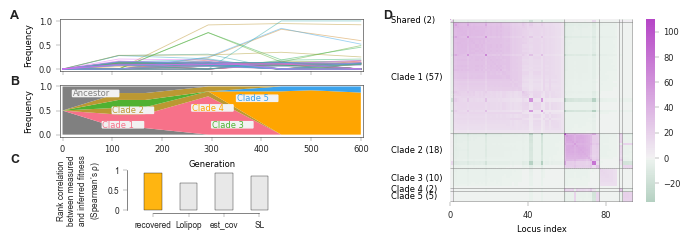

In [105]:
reload()
pop = 'P2'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=None)

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


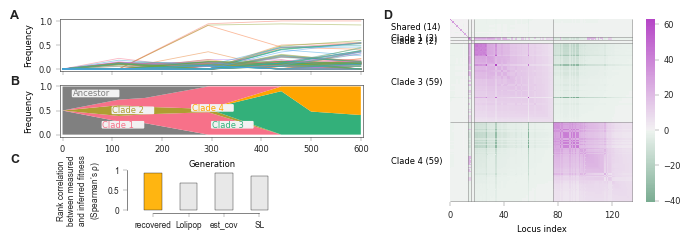

In [106]:
reload()
pop = 'P3'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=None)

### Supplementary Figure 1. Merging results from two successive competition periods.
Subfigures are created here and combined in ./figures/paper-clonal-structure-merge-periods-figure.pptx

In [15]:
reload()
params = SH.Params()  # Default parameters for simulation
simulation = SH.load_simulation(params, 6)
reconstruction, evaluation = SH.get_reconstruction_of_simulation(simulation)

In [16]:
print(reconstruction.periodBoundaries)
print(reconstruction.refinedPeriodBoundaries)

[(0, 706), (705, 1001)]
[(0, 508), (508, 1001)]


In [19]:
reload()
reconstruction = SH.load_reconstruction_for_a_simulation(params, 6)
FIG.save_subfigure_for_merge_periods(reconstruction, save_file_prefix='./figures/subfigures/6-merge-periods')

(508, 2) 4 6
(493, 4) 6 6


In [20]:
reload()
reconstruction = SH.load_reconstruction_for_a_simulation(params, 28)
FIG.save_subfigure_for_merge_periods(reconstruction, save_file_prefix='./figures/subfigures/28-merge-periods')

(681, 2) 4 6
(320, 2) 6 6


### Supplementary Figure 2. Performance benchmarking on simulated data when temporal density decreases.

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


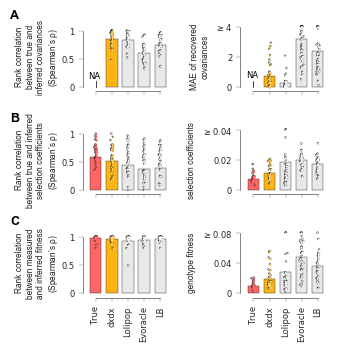

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


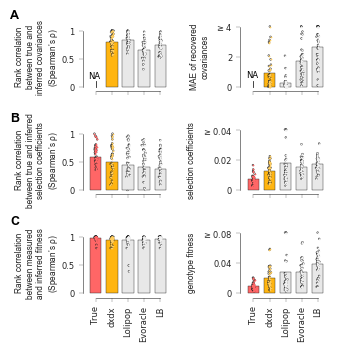

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


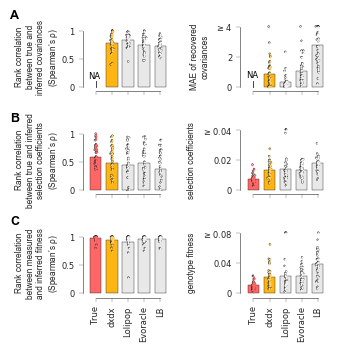

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


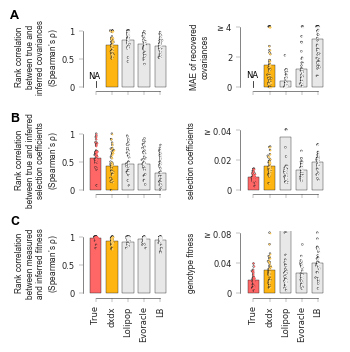

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


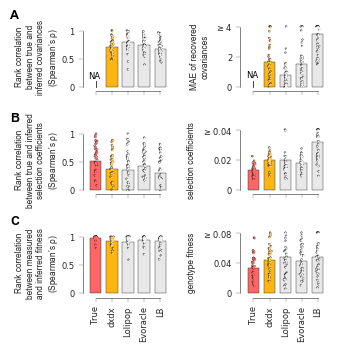

CPU times: user 10.1 s, sys: 321 ms, total: 10.4 s
Wall time: 10.9 s


In [21]:
%%time
reload()
dgs = [1, 10, 20, 50, 100]
figure_names = [f'fig-perf-sim-dg={dg}' for dg in dgs]
ymax_MAE_fitness_list = [0.08] * len(dgs)
for dg, figure_name, ymax_MAE_fitness in zip(dgs, figure_names, ymax_MAE_fitness_list):
    params = SH.Params()
    params.dg = dg
    (MAE_cov, Spearmanr_cov, Pearsonr_cov, MAE_selection, Spearmanr_selection, 
     Pearsonr_selection, MAE_fitness, Spearmanr_fitness, 
     Pearsonr_fitness) = SH.parse_performance_on_simulated_data(params, computePerfOnGenotypeFitness=True)
    FIG.plot_figure_performance_on_simulated_data(MAE_cov, 
        Spearmanr_cov, MAE_selection, Spearmanr_selection, 
        MAE_fitness=MAE_fitness, Spearmanr_fitness=Spearmanr_fitness, 
        two_columns=True, evaluate_fitness=True, method_list=FIG.METHODS[:-1],  # Excluding SL method
        ymax_MAE_fitness=ymax_MAE_fitness,
        # save_file=None,
        save_file=FIG_DIR + f"/{figure_name}.pdf"
     )

In [212]:
%%time
reload()
dgs = [1, 10, 20, 50, 100]
def compute_mean(metrics):
    return {key: np.mean(value) for key, value in metrics.items()}
MAE_cov_list, Spearmanr_cov_list, MAE_selection_list, Spearmanr_selection_list, MAE_fitness_list, Spearmanr_fitness_list = [], [], [], [], [], []
for dg in dgs:
    params = SH.Params()
    params.dg = dg
    (MAE_cov, Spearmanr_cov, Pearsonr_cov, MAE_selection, Spearmanr_selection, 
     Pearsonr_selection, MAE_fitness, Spearmanr_fitness, 
     Pearsonr_fitness) = SH.parse_performance_on_simulated_data(params, computePerfOnGenotypeFitness=True)
    MAE_cov_list.append(compute_mean(MAE_cov))
    Spearmanr_cov_list.append(compute_mean(Spearmanr_cov))
    MAE_selection_list.append(compute_mean(MAE_selection))
    Spearmanr_selection_list.append(compute_mean(Spearmanr_selection))
    MAE_fitness_list.append(compute_mean(MAE_fitness))
    Spearmanr_fitness_list.append(compute_mean(Spearmanr_fitness))

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n

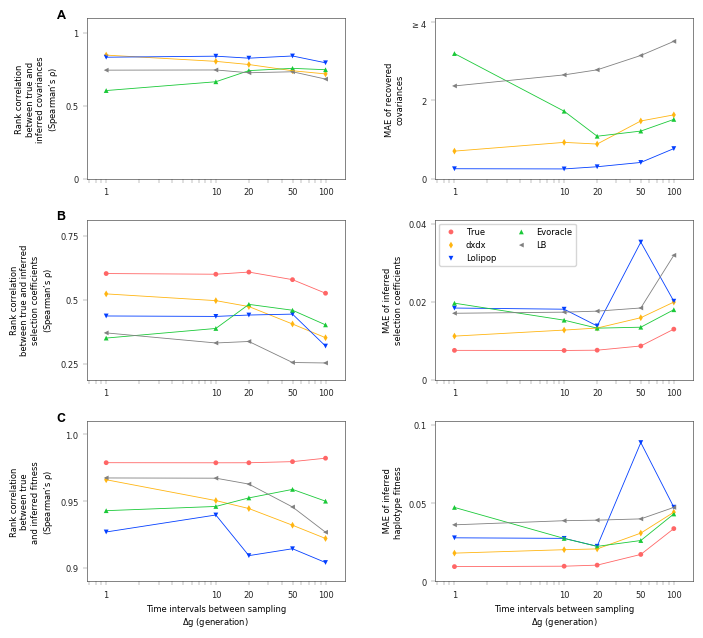

In [213]:
reload()
# sampling_intervals = dgs[:-1]
sampling_intervals = dgs
FIG.plot_figure_performance_on_simulated_data_with_temporal_subsampling(
    MAE_cov_list, Spearmanr_cov_list, MAE_selection_list, Spearmanr_selection_list, MAE_fitness_list, Spearmanr_fitness_list, sampling_intervals,
    method_list=FIG.METHODS[:-1],  # Excluding SL method
    save_file=FIG_DIR + f"/fig-perf-sim-temporal-subsampling-1-100.pdf"
)

In [1]:
# reload()
# sampling_intervals = dgs[:-1]
# FIG.plot_figure_performance_on_simulated_data_with_temporal_subsampling(
#     MAE_cov_list, Spearmanr_cov_list, MAE_selection_list, Spearmanr_selection_list, MAE_fitness_list, Spearmanr_fitness_list, sampling_intervals,
#     method_list=FIG.METHODS[:-1],  # Excluding SL method
#     save_file=FIG_DIR + f"/fig-perf-sim-temporal-subsampling-1-50.pdf"
# )

### Supplementary Figures 3-7
#### Supplementary Figure 3. Performance benchmarking on simulated data with a smaller population size (N=100)
#### Supplementary Figure 4. Performance benchmarking on simulated data with a larger population size (N=10000)
#### Supplementary Figure 5. Performance benchmarking on simulated data with recombination
#### Supplementary Figure 6. Performance benchmarking on simulated data with diploid genome
#### Supplementary Figure 7. Performance benchmarking on simulated data with random initial population

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


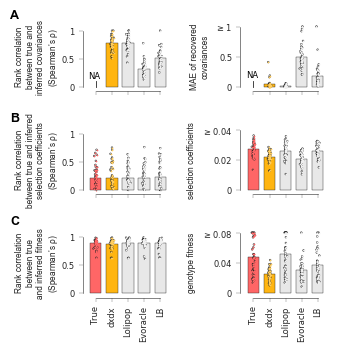

CPU times: user 5.12 s, sys: 92.1 ms, total: 5.21 s
Wall time: 5.35 s


In [185]:
# %%time
# reload()
# kwargs_list = [
#     {'N': 100, 'mu': 1e-3}, {'N': 10000}, {'recombination': True, 'recombination_rate': 1e-6}, {'recombination': True, 'recombination_rate': 1e-5}, {'random_init': True},
#     {'recombination': True, 'recombination_rate': 1e-6, 'diploid': True, 'mu': 4e-4}, {'recombination': True, 'recombination_rate': 1e-5, 'diploid': True, 'mu': 4e-4}
# ]
# figure_names = ['fig-perf-sim-N=100', 'fig-perf-sim-N=10000', 'fig-perf-sim-recombination-1e-6', 'fig-perf-sim-recombination-1e-5', 'fig-perf-sim-random-init', 
#                 'fig-perf-sim-diploid-recombination-1e-6', 'fig-perf-sim-diploid-recombination-1e-5']
# ymax_MAE_fitness_list = [0.08, 0.12, 0.08, 0.08, 0.08, 0.08, 0.08]
# ymax_MAE_covariance_list = [1, 4, 4, 4, 4, 16, 8]
# for kwargs, figure_name, ymax_MAE_fitness, ymax_MAE_covariance in zip(kwargs_list[0:1], figure_names[0:1], ymax_MAE_fitness_list[0:1], ymax_MAE_covariance_list[0:1]):
#     params = SH.Params(**kwargs)
#     (MAE_cov, Spearmanr_cov, Pearsonr_cov, MAE_selection, Spearmanr_selection, 
#      Pearsonr_selection, MAE_fitness, Spearmanr_fitness, 
#      Pearsonr_fitness) = SH.parse_performance_on_simulated_data(params, computePerfOnGenotypeFitness=True)
#     FIG.plot_figure_performance_on_simulated_data(MAE_cov, 
#         Spearmanr_cov, MAE_selection, Spearmanr_selection, 
#         MAE_fitness=MAE_fitness, Spearmanr_fitness=Spearmanr_fitness, 
#         two_columns=True, evaluate_fitness=True, method_list=FIG.METHODS[:-1],  # Excluding SL method
#         ymax_MAE_fitness=ymax_MAE_fitness, ymax_MAE_covariance=ymax_MAE_covariance,
#         # save_file=None,
#         save_file=FIG_DIR + f"/{figure_name}.pdf"
#      )

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


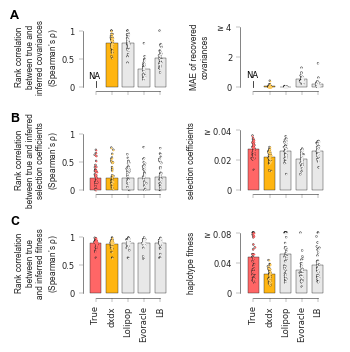

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


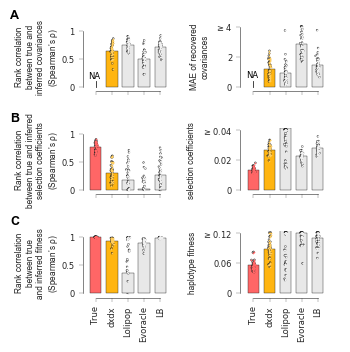

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


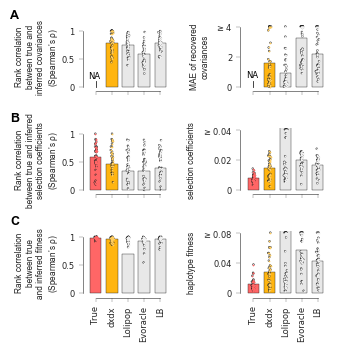

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


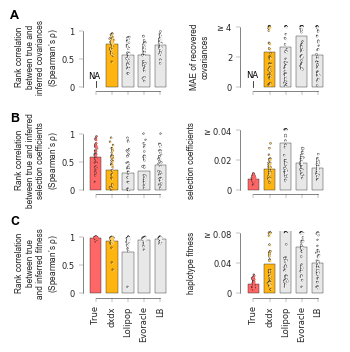

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


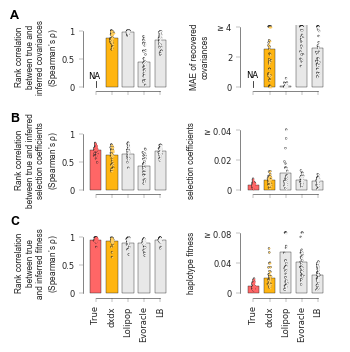

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


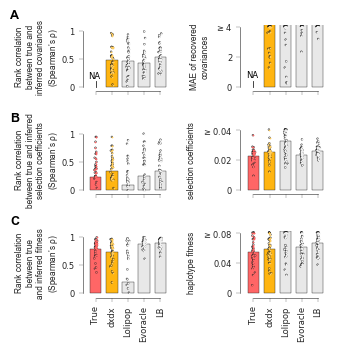

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


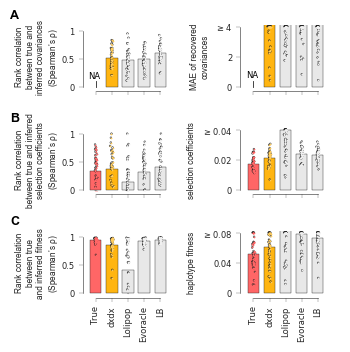

CPU times: user 2min 40s, sys: 686 ms, total: 2min 41s
Wall time: 2min 43s


In [215]:
# %%time
# reload()
# kwargs_list = [
#     {'N': 100, 'mu': 1e-3}, {'N': 10000}, {'recombination': True, 'recombination_rate': 1e-6}, {'recombination': True, 'recombination_rate': 1e-5}, {'random_init': True},
#     {'recombination': True, 'recombination_rate': 1e-6, 'diploid': True, 'mu': 0.0004}, {'recombination': True, 'recombination_rate': 1e-5, 'diploid': True, 'mu': 0.0004}
# ]
# figure_names = ['fig-perf-sim-N=100', 'fig-perf-sim-N=10000', 'fig-perf-sim-recombination-1e-6', 'fig-perf-sim-recombination-1e-5', 'fig-perf-sim-random-init', 
#                 'fig-perf-sim-diploid-recombination-1e-6', 'fig-perf-sim-diploid-recombination-1e-5']
# ymax_MAE_fitness_list = [0.08, 0.12, 0.08, 0.08, 0.08, 0.08, 0.08]
# for kwargs, figure_name, ymax_MAE_fitness in zip(kwargs_list, figure_names, ymax_MAE_fitness_list):
#     params = SH.Params(**kwargs)
#     (MAE_cov, Spearmanr_cov, Pearsonr_cov, MAE_selection, Spearmanr_selection, 
#      Pearsonr_selection, MAE_fitness, Spearmanr_fitness, 
#      Pearsonr_fitness) = SH.parse_performance_on_simulated_data(params, computePerfOnGenotypeFitness=True)
#     FIG.plot_figure_performance_on_simulated_data(MAE_cov, 
#         Spearmanr_cov, MAE_selection, Spearmanr_selection, 
#         MAE_fitness=MAE_fitness, Spearmanr_fitness=Spearmanr_fitness, 
#         two_columns=True, evaluate_fitness=True, method_list=FIG.METHODS[:-1],  # Excluding SL method
#         ymax_MAE_fitness=ymax_MAE_fitness,
#         # save_file=None,
#         save_file=FIG_DIR + f"/{figure_name}.pdf"
#      )

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


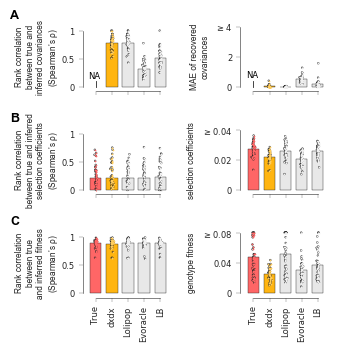

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


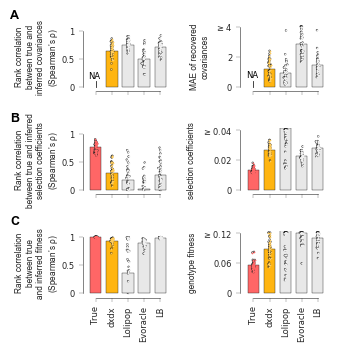

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


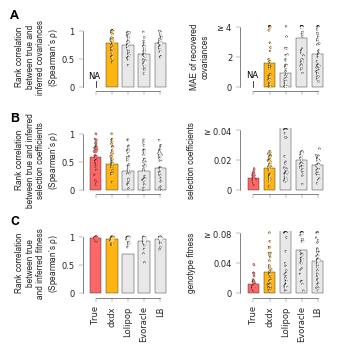

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


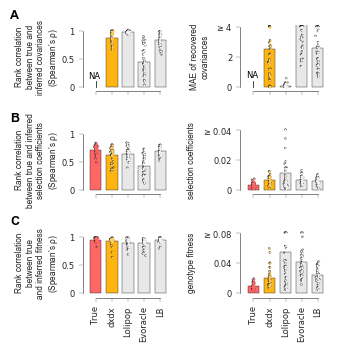

CPU times: user 1min 3s, sys: 540 ms, total: 1min 4s
Wall time: 1min 5s


In [122]:
# %%time
# reload()
# kwargs_list = [
#     {'N': 100, 'mu': 1e-3}, {'N': 10000}, {'recombination': True, 'recombination_rate': 1e-6}, {'recombination': True, 'recombination_rate': 1e-5}, {'random_init': True},
#     {'recombination': True, 'recombination_rate': 1e-6, 'diploid': True}, {'recombination': True, 'recombination_rate': 1e-5, 'diploid': True}
# ]
# figure_names = ['fig-perf-sim-N=100', 'fig-perf-sim-N=10000', 'fig-perf-sim-recombination-1e-6', 'fig-perf-sim-recombination-1e-5', 'fig-perf-sim-random-init', 
#                 'fig-perf-sim-diploid-recombination-1e-6', 'fig-perf-sim-diploid-recombination-1e-5']
# ymax_MAE_fitness_list = [0.08, 0.12, 0.08, 0.08, 0.08, 0.08, 0.08]
# for kwargs, figure_name, ymax_MAE_fitness in zip(kwargs_list, figure_names, ymax_MAE_fitness_list):
#     params = SH.Params(**kwargs)
#     (MAE_cov, Spearmanr_cov, Pearsonr_cov, MAE_selection, Spearmanr_selection, 
#      Pearsonr_selection, MAE_fitness, Spearmanr_fitness, 
#      Pearsonr_fitness) = SH.parse_performance_on_simulated_data(params, computePerfOnGenotypeFitness=True)
#     FIG.plot_figure_performance_on_simulated_data(MAE_cov, 
#         Spearmanr_cov, MAE_selection, Spearmanr_selection, 
#         MAE_fitness=MAE_fitness, Spearmanr_fitness=Spearmanr_fitness, 
#         two_columns=True, evaluate_fitness=True, method_list=FIG.METHODS[:-1],  # Excluding SL method
#         ymax_MAE_fitness=ymax_MAE_fitness,
#         # save_file=None,
#         save_file=FIG_DIR + f"/{figure_name}.pdf"
#      )

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


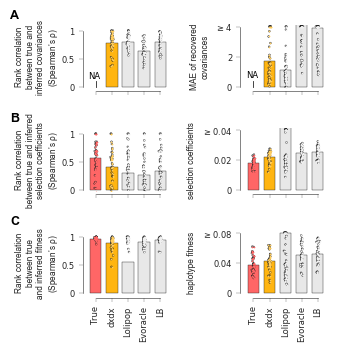

CPU times: user 10.5 s, sys: 1.04 s, total: 11.6 s
Wall time: 14.3 s


In [235]:
%%time
reload()
kwargs_list = [
    {'N': 100, 'mu': 1e-3}, {'N': 10000}, {'recombination': True, 'recombination_rate': 1e-6}, {'recombination': True, 'recombination_rate': 1e-5}, {'random_init': True},
    {'diploid': True, 'mu': 4e-4}
]
figure_names = ['fig-perf-sim-N=100', 'fig-perf-sim-N=10000', 'fig-perf-sim-recombination-1e-6', 'fig-perf-sim-recombination-1e-5', 'fig-perf-sim-random-init', 
                'fig-perf-sim-diploid']
ymax_MAE_fitness_list = [0.08, 0.12, 0.08, 0.08, 0.08, 0.08, 0.08]
for kwargs, figure_name, ymax_MAE_fitness in zip(kwargs_list[-1:], figure_names[-1:], ymax_MAE_fitness_list[-1:]):
    params = SH.Params(**kwargs)
    (MAE_cov, Spearmanr_cov, Pearsonr_cov, MAE_selection, Spearmanr_selection, 
     Pearsonr_selection, MAE_fitness, Spearmanr_fitness, 
     Pearsonr_fitness) = SH.parse_performance_on_simulated_data(params, computePerfOnGenotypeFitness=True)
    FIG.plot_figure_performance_on_simulated_data(MAE_cov, 
        Spearmanr_cov, MAE_selection, Spearmanr_selection, 
        MAE_fitness=MAE_fitness, Spearmanr_fitness=Spearmanr_fitness, 
        two_columns=True, evaluate_fitness=True, method_list=FIG.METHODS[:-1],  # Excluding SL method
        ymax_MAE_fitness=ymax_MAE_fitness,
        # save_file=None,
        save_file=FIG_DIR + f"/{figure_name}.pdf"
     )

Parsing for Lolipop...	Parsing for Evoracle...	Parsing for others...	n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	


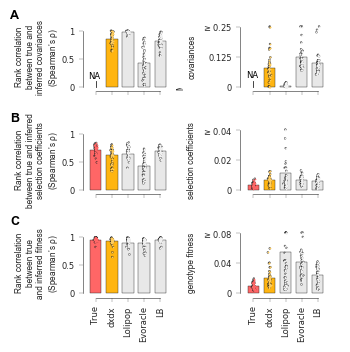

CPU times: user 12 s, sys: 178 ms, total: 12.2 s
Wall time: 12.4 s


In [200]:
# %%time
# reload()
# kwargs_list = [{'random_init': True}]
# figure_names = ['fig-perf-sim-random-init']
# ymax_MAE_fitness_list = [0.08]
# ymax_MAE_covariance_list = [0.25]
# for kwargs, figure_name, ymax_MAE_fitness, ymax_MAE_covariance in zip(kwargs_list, figure_names, ymax_MAE_fitness_list, ymax_MAE_covariance_list):
#     params = SH.Params(**kwargs)
#     (MAE_cov, Spearmanr_cov, Pearsonr_cov, MAE_selection, Spearmanr_selection, 
#      Pearsonr_selection, MAE_fitness, Spearmanr_fitness, 
#      Pearsonr_fitness) = SH.parse_performance_on_simulated_data(params, computePerfOnGenotypeFitness=True, computeErrorOnCorrelationMatrix=True)
#     FIG.plot_figure_performance_on_simulated_data(MAE_cov, 
#         Spearmanr_cov, MAE_selection, Spearmanr_selection, 
#         MAE_fitness=MAE_fitness, Spearmanr_fitness=Spearmanr_fitness, 
#         two_columns=True, evaluate_fitness=True, method_list=FIG.METHODS[:-1],  # Excluding SL method
#         ymax_MAE_fitness=ymax_MAE_fitness, ymax_MAE_covariance=ymax_MAE_covariance,
#         # save_file=None,
#         save_file=FIG_DIR + f"/{figure_name}_corr.pdf"
#      )

In [15]:
# %%time
# reload()
# kwargs_list = [
#     {'N': 100, 'mu': 1e-3}, {'N': 10000}, {'recombination': True, 'recombination_rate': 1e-6}, {'random_init': True}
# ]
# figure_names = ['fig-perf-sim-N=100', 'fig-perf-sim-N=10000', 'fig-perf-sim-recombination', 'fig-perf-sim-recombination-random-init']
# ymax_MAE_fitness_list = [0.08, 0.12, 0.08, 0.08]
# for kwargs, figure_name, ymax_MAE_fitness in zip(kwargs_list[2:3], figure_names[2:3], ymax_MAE_fitness_list[2:3]):
#     params = SH.Params(**kwargs)
#     (MAE_cov, Spearmanr_cov, Pearsonr_cov, MAE_selection, Spearmanr_selection, 
#      Pearsonr_selection, MAE_fitness, Spearmanr_fitness, 
#      Pearsonr_fitness) = SH.parse_performance_on_simulated_data(params, computePerfOnGenotypeFitness=True)
#     FIG.plot_figure_performance_on_simulated_data(MAE_cov, 
#         Spearmanr_cov, MAE_selection, Spearmanr_selection, 
#         MAE_fitness=MAE_fitness, Spearmanr_fitness=Spearmanr_fitness, 
#         two_columns=True, evaluate_fitness=True, method_list=FIG.METHODS[:-1],  # Excluding SL method
#         ymax_MAE_fitness=ymax_MAE_fitness,
#         # save_file=None,
#         save_file=FIG_DIR + f"/{figure_name}.pdf"
#      )

<a id='supp-fig1'></a>

### Supplementary Figure 8. Reconstruction for population p3 of LTEE data

In [229]:
%%time
reload()
pop = 'p3'
rec_0_70 = LH.reconstruct_for_a_period(pop, 0, 70, debug=False, verbose=False, plot=False)
rec_70_122 = LH.reconstruct_for_a_period(pop, 70, 122, debug=False, verbose=False, plot=False)

CPU times: user 24.4 s, sys: 663 ms, total: 25 s
Wall time: 25.4 s


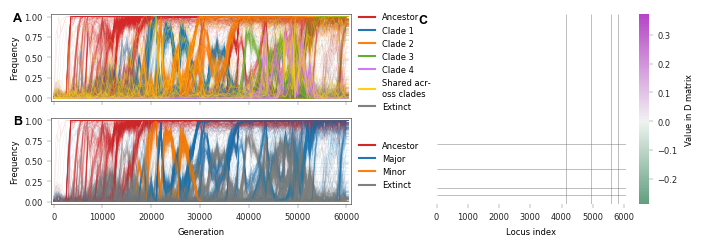

In [230]:
reload()
pop = 'p3'
FIG.plot_figure_reconstruction_example_LTEE_two_periods(pop, rec_0_70, rec_70_122, LH.data,
    directory=CLUSTERIZATION_OUTPUT_DIR,
    alpha=0.15,
    save_file=FIG_DIR + "/fig-reconstruction-example-LTEE-p3-two-periods.pdf")

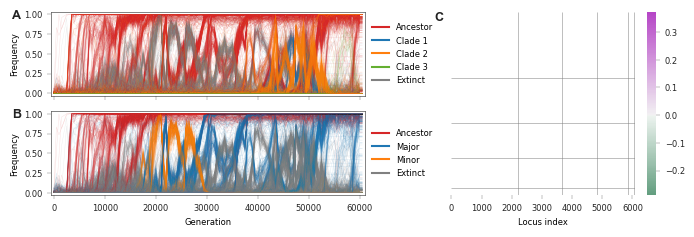

In [102]:
# reload()
# pop = 'p3'
# FIG.plot_figure_reconstruction_example_LTEE(pop, reconstructions[pop], 
#     LH.data, alpha=0.15,
#     save_file=FIG_DIR + "/fig-reconstruction-example-LTEE-p3-one-period.pdf")

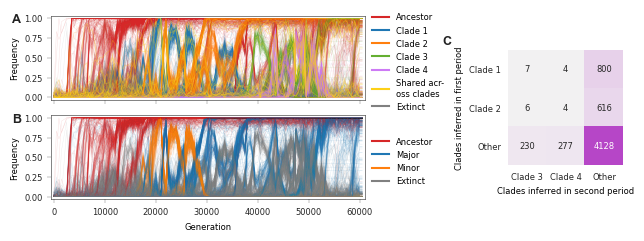

In [128]:
# reload()
# pop = 'p3'
# FIG.plot_figure_reconstruction_example_LTEE_two_periods_alternative(pop, rec_0_70, rec_70_122, LH.data,
#     directory=CLUSTERIZATION_OUTPUT_DIR,
#     alpha=0.15,
#     save_file=FIG_DIR + "/fig-reconstruction-example-LTEE-p3-two-periods-alt.pdf")

### Supplementary Figure 9. Reconstruction on data from ***Scribner, M. R., Santos-Lopez, A., Marshall, C. W., Deitrick, C. & Cooper, V. S. Parallel Evolution of Tobramycin Resistance across Species and Environments. MBio 11, (2020)***

In [231]:
%%time
reload()
tobramycin_analysis.load_df_traj()
intCov_lolipop_TOB, selection_lolipop_TOB, fitness_lolipop_TOB = tobramycin_analysis.parse_Lolipop_results()
intCov_evoracle_TOB, selection_evoracle_TOB, fitness_evoracle_TOB = tobramycin_analysis.parse_evoracle_results()
reconstructions_TOB, evaluations_TOB, inferences_TOB = tobramycin_analysis.parse_reconstructions(assumeCooperationAmongSharedMuts=True)
measured_MIC_list = tobramycin_analysis.parse_measured_MIC_list()
median_inferred_fitness_lists = tobramycin_analysis.parse_median_inferred_fitness_list_of_methods(inferences_TOB, 
    selection_lolipop_TOB, selection_evoracle_TOB)



CPU times: user 221 ms, sys: 29.1 ms, total: 250 ms
Wall time: 283 ms


In [232]:
print('Measured MIC:', measured_MIC_list)
print('Evoracle:', ['%.2f'%_ for _ in median_inferred_fitness_lists[tobramycin_analysis.METHODS.index('Evoracle')]])
print('Lolipop:', ['%.2f'%_ for _ in median_inferred_fitness_lists[tobramycin_analysis.METHODS.index('Lolipop')]])


Measured MIC: [0.5, 2.0, 2.0, 2.0, 1.0, 1.0, 4.0, 4.0]
Evoracle: ['1.00', '1.27', '1.05', '1.20', '1.25', '1.25', '1.30', '1.85']
Lolipop: ['1.00', '1.09', '1.00', '1.06', '1.06', '1.07', '1.07', '1.24']


[0.5, 2.0, 2.0, 2.0, 1.0, 1.0, 4.0, 4.0]
[0.7165410061057312, 0.5312286769404558, 0.7165410061057312, 0.2470831055537004]


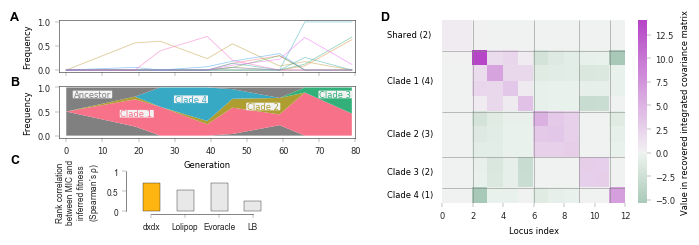

In [233]:
reload()
medium, rpl = 'Planktonic', 1
FIG.plot_figure_performance_on_data_tobramycin(tobramycin_analysis.traj_pa[medium][rpl][0], 
    reconstructions_TOB[medium][rpl], measured_MIC_list, median_inferred_fitness_lists,
    save_file=FIG_DIR + f"/fig-perf-tobramycin-{medium}-{rpl+1}-new.pdf")

[0.5, 2.0, 2.0, 2.0, 1.0, 1.0, 4.0, 4.0]
[0.7165410061057312, 0.5312286769404558, 0.7165410061057312, 0.2470831055537004]


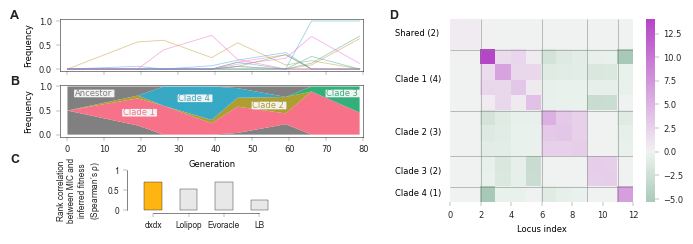

In [36]:
# reload()
# medium, rpl = 'Planktonic', 1
# FIG.plot_figure_performance_on_data_tobramycin(tobramycin_analysis.traj_pa[medium][rpl][0], 
#     reconstructions_TOB[medium][rpl], measured_MIC_list, median_inferred_fitness_lists,
#     save_file=FIG_DIR + f"/fig-perf-tobramycin-{medium}-{rpl+1}-new-assumeCoopAmongSharedMuts.pdf")

### Supplementary Figure 10. Compare run time of different methods on LTEE data

In [86]:
reload()
num_alleles_sorted, run_time = LH.get_all_methods_run_time()

                 p2    p4    p5    m6    m5    p1    m3    m2    m1    m4    p3     p6
num_alleles     174   201   202   221   406   466  3255  3488  4597  4872  6102  10134
recovered (h)  0.01  0.01  0.01  0.01  0.02  0.02  0.62  0.52  0.95  1.64  1.69      3
Lolipop (h)    0.18  0.22  0.24   0.4  1.39  1.68   nan   nan   nan   nan   nan    nan
Evoracle (h)   2.55  3.12  3.85  3.98  5.45  6.36   nan   nan   nan   nan   nan    nan


In [12]:
reload()
num_alleles_sorted, run_time = LH.get_all_methods_run_time()

                 p2    p4    p5    m6    m5    p1    m3    m2    m1    m4    p3     p6
num_alleles     174   201   202   221   406   466  3255  3488  4597  4872  6102  10134
recovered (h)  0.02  0.02  0.01  0.02  0.05  0.03  2.29  2.46  1.91  2.17  3.08   6.79
Lolipop (h)    0.18  0.22  0.24   0.4  1.39  1.68   nan   nan   nan   nan   nan    nan
Evoracle (h)   2.55  3.12  3.85  3.98  5.45  6.36   nan   nan   nan   nan   nan    nan


method=dxdx, slope=1.475, intercept=-5.407, rvalue=0.993, pvalue=0.000


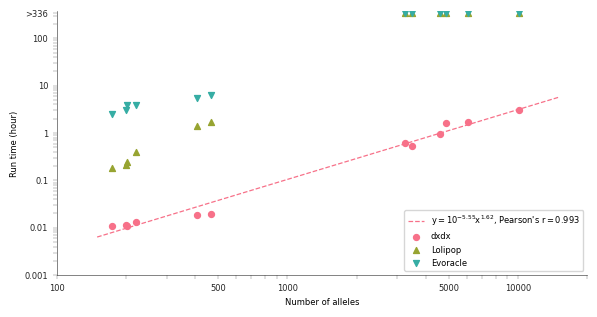

In [88]:
reload()
FIG.plot_figure_runtime_LTEE(LH.populations_sorted_by_num_alleles, num_alleles_sorted, run_time, 
    save_file=FIG_DIR + f"/fig-LTEE-run-time.pdf")